### Classification with CIFAR-10 Dataset and Multi-Layer Perceptron
This script sets up a Multi-Layer Perceptron (MLP) to classify two classes from the CIFAR-10 dataset.

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import numpy as np
from utils import *

/usr/local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = get_cifar10_data(vectorize=True)

Build a binary linear classifier model.

In [3]:
model = Sequential()
model.add(Dense(500,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(200,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               1536500   
_________________________________________________________________
dense_2 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 1,636,901
Trainable params: 1,636,901
Non-trainable params: 0
_________________________________________________________________


Set up the model to optimize the binary crossentropy loss using stochastic gradient descent.

In [4]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Optimize the model over the training data.

In [5]:
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=50,
                    verbose=1,
                    validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 2s 285us/step - loss: 0.4296 - acc: 0.8056 - val_loss: 0.3864 - val_acc: 0.8360
Epoch 2/50
8000/8000 [==============================] - 0s 52us/step - loss: 0.2900 - acc: 0.8700 - val_loss: 0.3303 - val_acc: 0.8550
Epoch 3/50
8000/8000 [==============================] - 0s 52us/step - loss: 0.2340 - acc: 0.9036 - val_loss: 0.3285 - val_acc: 0.8645
Epoch 4/50
8000/8000 [==============================] - 0s 50us/step - loss: 0.1996 - acc: 0.9184 - val_loss: 0.3140 - val_acc: 0.8720
Epoch 5/50
8000/8000 [==============================] - 0s 51us/step - loss: 0.1594 - acc: 0.9361 - val_loss: 0.3974 - val_acc: 0.8510
Epoch 6/50
8000/8000 [==============================] - 0s 52us/step - loss: 0.1307 - acc: 0.9504 - val_loss: 0.3353 - val_acc: 0.8840
Epoch 7/50
8000/8000 [==============================] - 0s 54us/step - loss: 0.1131 - acc: 0.9574 - val_loss: 0.3727 - val_acc: 0.8635
Epoch 

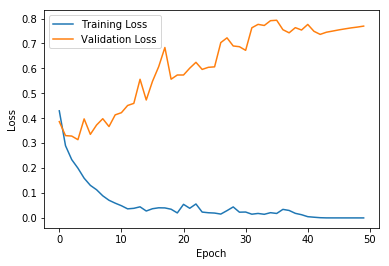

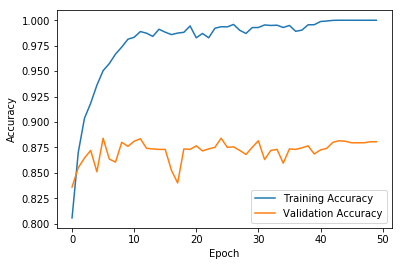

In [6]:
plot_history(history)

In [7]:
evaluate_test_accuracy(model,x_test,y_test)

2000/2000 [==============================] - 0s 38us/step
Test accuracy: 89.85%
